In [42]:
import pandas as pd 
import ucimlrepo

In [43]:
data  = ucimlrepo.fetch_ucirepo(id=350)

In [44]:
data.data.targets

## 1 = yes ==> default
## 0 = No ==> Not default

,Y
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


In [45]:
data.data.features.shape 

(30000, 23)

In [46]:
# metadata 
print(data.metadata) 


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'The comparisons of data mining techniques for the predictive accuracy of probability of default of cre

### Data
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female) converted to (1 = male; 0 = female) .
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [47]:
data.variables.head(20) 

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,X1,Feature,Integer,None,LIMIT_BAL,None,no
2,X2,Feature,Integer,Sex,SEX,None,no
3,X3,Feature,Integer,Education Level,EDUCATION,None,no
4,X4,Feature,Integer,Marital Status,MARRIAGE,None,no
5,X5,Feature,Integer,Age,AGE,None,no
6,X6,Feature,Integer,None,PAY_0,None,no
7,X7,Feature,Integer,None,PAY_2,None,no
8,X8,Feature,Integer,None,PAY_3,None,no
9,X9,Feature,Integer,None,PAY_4,None,no


In [48]:
final_dataset = pd.concat([data.data.features,  data.data.targets], axis = 1)
final_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
final_dataset['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

In [50]:
final_dataset.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [51]:
def set_gender(value):
    if value == 1:
        return 1
    else:
        return 0
    
final_dataset['X2'] = final_dataset['X2'].apply(set_gender)
final_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
final_dataset.to_csv("Taiwanese_credit_risk_dataset.csv", index=False)

In [53]:
df = pd.read_csv('Taiwanese_credit_risk_dataset.csv')
df.shape

(30000, 24)

## lets create and save train and test split for training

In [54]:
from sklearn.model_selection import train_test_split

def split_and_save_data(df, test_size=0.2, train_filepath='train.csv', test_filepath='test.csv', random_state=10):
    # Split the DataFrame into training and testing sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Save the training set to a CSV file
    train_df.to_csv(train_filepath, index=False)
    print(f"Training data saved to {train_filepath}")
    
    # Save the testing set to a CSV file
    test_df.to_csv(test_filepath, index=False)
    print(f"Testing data saved to {test_filepath}")
    
    return train_df, test_df

train_df, test_df = split_and_save_data(df)


Training data saved to train.csv
Testing data saved to test.csv


In [55]:
print("shape of training data", train_df.shape)
print("shape of testing data", test_df.shape)

shape of training data (24000, 24)
shape of testing data (6000, 24)


## lets look at the bounds for each column

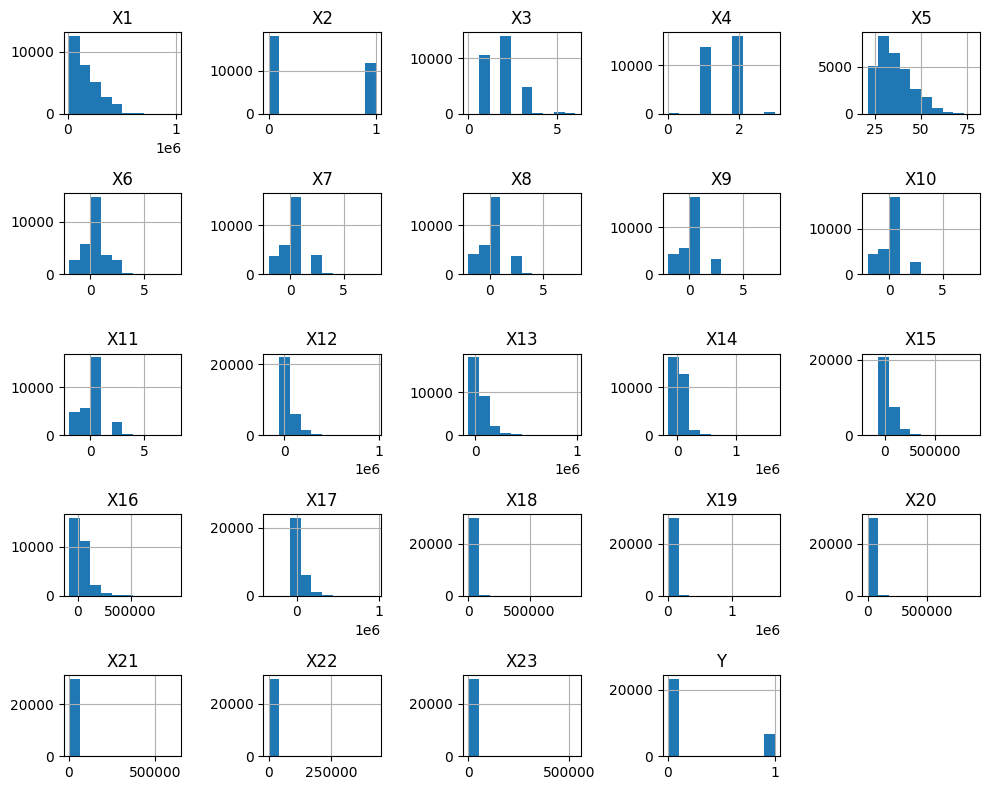

In [56]:
import matplotlib.pyplot as plt
import pandas as pd




df.hist(bins=10, figsize=(10, 8))


plt.tight_layout()
plt.show()

In [57]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,1.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,1.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [58]:
df[df['Y'] == 1].shape

(6636, 24)

In [59]:
df[df['Y'] == 0].shape

(23364, 24)

In [60]:
def balance_dataset(df, column_name):
    # Find the size of the smallest class
    min_class_size = df[column_name].value_counts().min()
    
    # Sample from each class to get an equal number of rows
    balanced_df = df.groupby(column_name).apply(lambda x: x.sample(min_class_size)).reset_index(drop=True)
    
    return balanced_df

balanced_df = balance_dataset(df, 'Y')

In [61]:
balanced_df[balanced_df['Y'] == 1].shape

(6636, 24)

In [62]:
balanced_df[balanced_df['Y'] == 0].shape

(6636, 24)

In [63]:
balanced_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000,...,13272.000000,13272.000000,13272.000000,13272.000000,1.327200e+04,13272.000000,13272.000000,13272.000000,13272.000000,13272.000000
mean,154470.138638,0.407550,1.867541,1.542646,35.550784,0.232595,0.074367,0.019063,-0.049955,-0.111287,...,43204.789783,40243.148885,38930.286920,4945.544153,5.000603e+03,4563.121609,4160.468505,4320.769515,4516.938743,0.500000
std,127240.397860,0.491397,0.768274,0.523422,9.394259,1.271429,1.348246,1.337151,1.318243,1.283041,...,65136.645217,61811.376223,60280.151446,16086.538503,2.053096e+04,17947.016105,14342.942041,15074.780392,15849.715898,0.500019
min,10000.000000,0.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2348.000000,1721.250000,1272.000000,390.000000,3.900000e+02,213.500000,16.000000,4.000000,0.000000,0.000000
50%,120000.000000,0.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19112.000000,18181.000000,17511.500000,2000.000000,2.000000e+03,1531.500000,1253.000000,1300.000000,1204.000000,0.500000
75%,220000.000000,1.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,53285.750000,49409.750000,48691.000000,4557.750000,4.406500e+03,4000.000000,3520.500000,3600.000000,3500.000000,1.000000
max,1000000.000000,1.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.215471e+06,896040.000000,621000.000000,417990.000000,403500.000000,1.000000


In [64]:
balanced_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,80000,1,1,2,26,1,2,2,0,0,...,40793,42990,42854,2000,0,1603,3000,2000,1056,0
1,470000,1,2,2,31,0,0,0,0,0,...,85334,87948,90479,3000,3500,4000,4000,4000,4200,0
2,30000,0,2,2,22,0,0,0,0,-1,...,25130,7746,10583,3000,3376,5076,8009,6017,3023,0
3,170000,0,1,2,25,0,0,0,0,0,...,68724,68889,69712,3100,3626,2500,2450,2693,2602,0
4,60000,1,2,2,27,0,0,0,2,2,...,29906,29292,29729,3300,3900,1500,0,1074,1200,0


In [65]:
# balanced_df.drop(['Unnamed: 0'], axis=1, inplace=True)
balanced_df.to_csv('Taiwanese_credit_risk_dataset_balanced.csv', index=False)

In [66]:
train_df_b, test_df_b = split_and_save_data(balanced_df, train_filepath='train_balanced.csv', test_filepath='test_balanced.csv')

Training data saved to train_balanced.csv
Testing data saved to test_balanced.csv


In [67]:
train_df_b.shape, test_df_b.shape

((10617, 24), (2655, 24))

In [68]:
train_df_b.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
5472,120000,0,2,1,25,0,0,0,-2,-2,...,0,0,0,6000,0,0,0,0,0,0
2317,30000,0,3,1,41,1,2,0,0,2,...,30566,29229,26260,0,2000,2200,0,1100,1100,0
8567,20000,0,2,1,32,3,2,2,7,7,...,2400,2400,2400,0,0,0,0,0,0,1
686,200000,0,1,2,28,-1,-1,2,-1,-1,...,1117,1117,0,26286,0,1117,1117,0,1128,0
2132,50000,1,1,2,28,0,0,-1,-1,-1,...,11132,0,0,5224,19906,11132,0,0,0,0
